# MINI CAPSTONE 


## TELCO CUSTOMER CHURN DATASET


#### A fictional telco company that provided home phone and Internet services to 7043 customers in California in Quarter 3 of the fiscal year.

## ATTRIBUTES INFORMATION :


###### 1.CustomerID	: 
A unique ID that identifies each customer
###### 2.Count : 
A value used in reporting/dashboarding to sum up the number of customers in a filtered set
###### 3.Country : 
The country of the customer’s primary residence
###### 4.State : 
The state of the customer’s primary residence
###### 5.City : 
The city of the customer’s primary residence
###### 6.Zip Code :	
The zip code of the customer’s primary residence
###### 7.Lat Long :
The combined latitude and longitude of the customer’s primary residence
###### 8.Latitude :
The latitude of the customer’s primary residence
###### 9.Longtitude :
The longitude of the customer’s primary residence
###### 10.Gender :
The customer’s gender: Male, Female
###### 11.Senior Citizen :
Indicates if the customer is 65 or older: Yes, No
###### 12	Partner :
Indicate if the customer has a partner: Yes, No
###### 13.Dependents :
Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc
###### 14.Tenure Months :
Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above
###### 15.Phone Service	:
Indicates if the customer subscribes to home phone service with the company: Yes, No
###### 16.Multiple Lines :
Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
###### 17.Internet Service :
Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable
###### 18.Online Security :
Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
###### 19.Online Backup :
Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
###### 20.Device Protection :
Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
###### 21.Tech Support :
Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
###### 22.Streaming TV :
Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service
###### 23.Streaming Movies :
Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service
###### 24.Contract :
Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year
###### 25.Paperless Billing :
Indicates if the customer has chosen paperless billing: Yes, No
###### 26.Payment Method :
Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
###### 27.Monthly Chargers :
Indicates the customer’s current total monthly charge for all their services from the company
###### 28.Total Chargers :
Indicates the customer’s total charges, calculated to the end of the quarter specified above
###### 29.Churn Label :
Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value
###### 30.Churn Value :
1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label
###### 31.Churn Score :
A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn
###### 32.CLTV :
Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn
###### 33.Churn Reason :
A customer’s specific reason for leaving the company. Directly related to Churn Category

In [40]:
# IMPORTING REQUIRED LIBRARIES 
import pandas as pd
import numpy as np
## LIBRARIES FOR DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
## ALLOWS TO HANDLE THE WARNINGS
import warnings 
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import boxcox
import missingno as msno
pd.pandas.set_option('display.max_columns',None)

In [41]:
# IMPORTING THE DATA
cust = pd.read_csv("Telco_customer_churn.xlsx - Telco_Churn.csv")
# READING THE FIRST FIVE ROWS TO CHECK DATA WITH ALL COLUMNS
cust.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [42]:
# CHECKING LAST 5 ROWS WHETHER THE 1 FIVE AND LAST FIVE ROWS ARE SAME OR NOT
cust.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [43]:
# CHECKING THE SHAPE OF THE DATA
cust.shape

(7043, 33)

In [44]:
# CHECKING COMPLETE SIZE OF THE DATA
cust.size

232419

In [45]:
## GETTING THE TOTAL INFORMATION ABOUT THE DATA INCLUDING DATATYPE, COUNT OF ROWS PRESENT AND NULL VALUES COUNT 

cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [46]:
# CHECKING THE ALL DATA TYPE OF THE ATTRIBUTES
cust.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [47]:
## STATICALSUMMERY OF DATASET

cust.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Zip Code,7043.0,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
Latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Tenure Months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
Churn Value,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
Churn Score,7043.0,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7043.0,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


In [48]:
##  CHECKING FOR NULL VALUES

cust.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

### Q1: Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.

* In this given data 33 variables are there.
 * For all categorical data python reading as object (default always). So, changing all object type data to categorical data. 
 * In this 33 variables for 'zip code', 'total charges' and 'churn value' variables python reading wrong.
 * Zip Codes are not numeric data. Numeric data is data in which it makes sense to do mathematical operations on, which you would never do with a Zip Code. So, changing 'zip code' variable to categorical data type.
 * For 'Total charges' variable python reading it as object which means categorical. It is also wrong. Total charges are numerical values and there is possible to have intermediate values. So, changing this variable to 'float' type.
 * Python reading 'churn value' variable as integer but the values present in churn variable are dummies. Actually 1 = the customer left the company this quarter. 0 = the customer remained with the company. So, 'Churn Value' variable is categorical data type.


| Variables | Data Type|
| --- | --- | 
| CustomerID | Categorical (ordinal)|
|Count| Numerical (Descrete)|                   
|Country| categorical (Nominal) |                 
|State|categorical (Nominal) |                    
|City | categorical (Nominal)|
|Zip Code |categorical (ordinal)|                
|Lat Long |Numerical (continuous)|                
|Latitude|Numerical (continuous)                
|Longitude |Numerical (continuous)|              
|Gender | categorical (Nominal) |                  
|Senior Citizen|categorical (Nominal)|          
|Partner|categorical (Nominal)|                 
|Dependents|categorical (Nominal)|              
|Tenure Months | Numerical (Descrete)|         
|Phone Service|categorical (Nominal)|           
|Multiple Lines|categorical (Nominal)|          
|Internet Service|categorical (Nominal)|        
|Online Security |categorical (Nominal)|        
|Online Backup|categorical (Nominal)|           
|Device Protection|categorical (Nominal)|       
|Tech Support |categorical (Nominal)|           
|Streaming TV |categorical (Nominal)|           
|Streaming Movies|categorical (Nominal)|        
|Contract|categorical (Nominal)|                
|Paperless Billing|categorical (Nominal)|       
|Payment Method|categorical (Nominal)|          
|Monthly Charges|Numerical (continuous)|         
|Total Charges|Numerical (continuous)|           
|Churn Label|categorical (Nominal)|             
|Churn Value|categorical (Nominal)|             
|Churn Score|Numerical (Descrete)|             
|CLTV|Numerical (Descrete)| 
|Churn Reason|categorical (Nominal)|

In [49]:
# TAKING THE ALL OBJECT DATA TYPE COLUMN IN 'CAT_COLS'
cat_cols = ['CustomerID', 'Country', 'State', 'City', 'Zip Code','Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
            'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support',
            'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Value','Churn Label' ,'Churn Reason']
# CONVERTING 'CAT_COLS' ATTRIBUTES INTO CATEGORICAL DATA
cust[cat_cols] = cust[cat_cols].astype('category')

In [50]:
# CHANGING TOTAL CHARGES COLUMN INTO FLOAT TYPE
cust['Total Charges'] = pd.to_numeric(cust['Total Charges'],errors='coerce')
cust['Total Charges'] = cust['Total Charges'].astype("float")

In [51]:
cust.dtypes

CustomerID           category
Count                   int64
Country              category
State                category
City                 category
Zip Code             category
Lat Long             category
Latitude              float64
Longitude             float64
Gender               category
Senior Citizen       category
Partner              category
Dependents           category
Tenure Months           int64
Phone Service        category
Multiple Lines       category
Internet Service     category
Online Security      category
Online Backup        category
Device Protection    category
Tech Support         category
Streaming TV         category
Streaming Movies     category
Contract             category
Paperless Billing    category
Payment Method       category
Monthly Charges       float64
Total Charges         float64
Churn Label          category
Churn Value          category
Churn Score             int64
CLTV                    int64
Churn Reason         category
dtype: obj

=========================================================================================================================

### Q2: Please apply appropriate statistical measures using python based on data types.

###### STATISTICAL MEASURES FOR NUMERICAL DATA :-

In [52]:
# USING DESCRIBE FUNCTION GETTING THE STATISTICAL MEASURES OF ALL NUMERICAL DATA
cust.describe()

,Count,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000
mean,1.0,36.282441,-119.798880,32.371149,64.761692,2283.300441,58.699418,4400.295755
std,0.0,2.455723,2.157889,24.559481,30.090047,2266.771362,21.525131,1183.057152
min,1.0,32.555828,-124.301372,0.000000,18.250000,18.800000,5.000000,2003.000000
25%,1.0,34.030915,-121.815412,9.000000,35.500000,401.450000,40.000000,3469.000000
50%,1.0,36.391777,-119.730885,29.000000,70.350000,1397.475000,61.000000,4527.000000
75%,1.0,38.224869,-118.043237,55.000000,89.850000,3794.737500,75.000000,5380.500000
max,1.0,41.962127,-114.192901,72.000000,118.750000,8684.800000,100.000000,6500.000000


###### STATISTICAL MEASURES FOR NUMERICAL AND CATEGORICAL DATA :-

In [53]:
# GETTING STATISTICAL MEASURES OF CATEGORICAL DATA
cust.describe(include = 'category')

,CustomerID,Country,State,City,Zip Code,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Value,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869
unique,7043,1,1,1129,1652,1652,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,2,20
top,0002-ORFBO,United States,California,Los Angeles,90001,"32.555828, -117.040073",Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,0,Attitude of support person
freq,1,7043,7043,305,5,5,3555,5901,3641,5416,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174,5174,192


=========================================================================================================================

### Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.


<AxesSubplot:ylabel='None'>

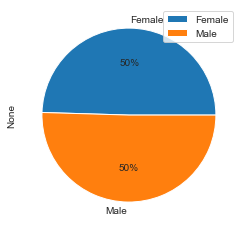

In [54]:
# USING PIE PLOT VISUALIZING THE MALE AND FEMALE PERCENTAGE
cust.groupby('Gender').size().plot(kind='pie', legend=True, autopct='%1.0f%%')

###### THE PERCENTAGE OF FEMALES IN THIS DATA IS 50% 

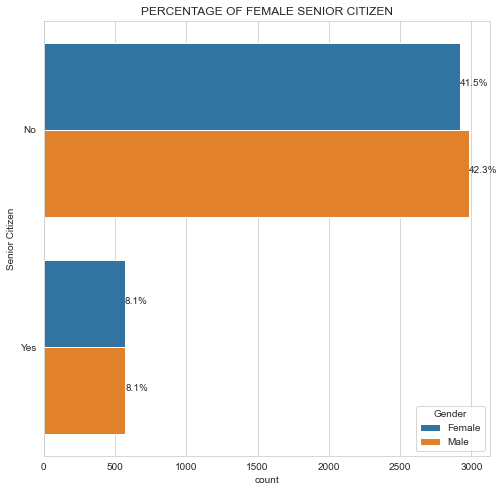

In [55]:
# USING DEF FUNCTION TO DEFING BAR_PLOT(CUST, COLUMN)
def bar_plot(cust,column):    
    # GIVING SIZE TO PLOT
    plt.figure(figsize=(8,8))  
    # USING COUNT PLOT VISUALIZING COUNT AND PERCENTAGE OF SENIOR CITIZEN PEOPLE AND 
    # COUNTING WHO ARE NOT SENIOR CITIZEN
    ax = sns.countplot(y=column, hue = 'Gender', data=cust)
    # GIVING TITLE TO PLOT
    plt.title('PERCENTAGE OF FEMALE SENIOR CITIZEN')
    # CALCULATING THE LENGHT OF COLUMN WHICH WE WILL GIVES IN INPUT
    total = len(cust[column])
    for p in ax.patches:
        # COLCULATING PERCENTAGE THROUGH COUNT
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        # GIVING HIEGHT AND WIDTH TO BARS
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
    
bar_plot(cust, "Senior Citizen")

=========================================================================================================================

###  Q4:  Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

Text(0.5, 1.0, 'distribution of Tenure Months')

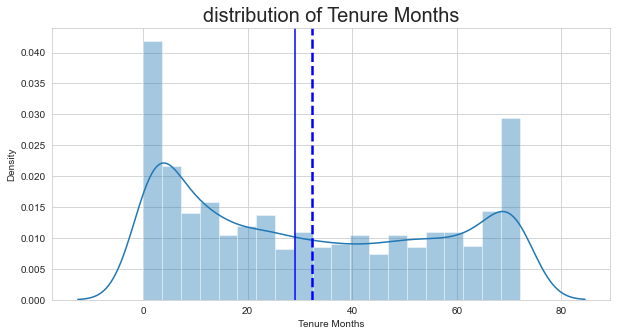

In [56]:
## VISUALIZING DISTRIBUTION OF 'TENURE MONTHS' BY USING DISTRIBUTION PLOT 
plt.figure(figsize=(10,5))
sns.distplot(cust['Tenure Months'],bins = 20, kde = True)

# GIVING MEAN AND MEDIAN TO THE DISTRIBUTION  
plt.axvline(x=cust['Tenure Months'].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
plt.axvline(x=cust['Tenure Months'].median(),color='blue',label="median") # fixing 'median' line and its characteristics.

plt.show

## GIVING TITLE TO PLOT 
plt.title('distribution of Tenure Months',fontsize=20) 

* As we know the skewness value is between -0.5 to 0.5 the data is normally distributed.
* 'Tenure Months' data is normally distributed.
* There is no need to perform transformation for this variable.

###### "Tenure Months" variable is numerical data. The mean, median, Standard deviation, percentile and variance are the most commonly used statistical measures for numerical data.

In [57]:
# PERFORMING STATISTICAL MEASURES FOR TENURE MONTHS VARIABLE

print("Mean :", cust['Tenure Months'].mean())
print("Median :", cust['Tenure Months'].median())
print("SD : ", cust['Tenure Months'].std())
print("25% : ", cust['Tenure Months'].quantile(0.25))
print("50% : ", cust['Tenure Months'].quantile(0.5))
print("75% : ", cust['Tenure Months'].quantile(0.75))
print("Variance :", cust['Tenure Months'].var())

Mean : 32.37114865824223
Median : 29.0
SD :  24.55948102309432
25% :  9.0
50% :  29.0
75% :  55.0
Variance : 603.1681081237301


In [58]:
# FINDING SKEWNESS
cust['Tenure Months'].skew()

0.2395397495619829

* IF THE SKEWNESS VALUE IS BETWEEN ["-0.5 TO 0.5"], THEN THAT DATA IS "NORMALLY DISTRIBUTED"
* So, The Tenure Months variable skewness is '0.24'. That means it is normally distributed.

=========================================================================================================================

### Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

In [59]:
## converting all binary columns into 0 and 1 using lambda function

label_encoding_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 
                          'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 
                          'Streaming Movies', 'Paperless Billing','Churn Label' ]
for column in label_encoding_columns :
    if column == 'Gender':
        cust[column] = cust[column].apply(lambda row:1 if row == 'Female' else 0)
    else :
        cust[column] = cust[column].apply(lambda row:1 if row == 'Yes' else 0)    

In [60]:
cust.head(20)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,1,0,0,1,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,1,0,0,1,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,1,0,1,1,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,0,0,0,1,49,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,1,0,1,0,10,1,0,DSL,0,0,1,1,0,0,Month-to-month,0,Credit card (automatic),55.20,528.35,1,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,0,1,0,0,1,0,0,DSL,0,0,1,0,0,1,Month-to-month,1,Electronic check,39.65,39.65,1,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,0,0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,20.15,20.15,1,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,0,0,1,1,47,1,1,Fiber optic,0,1,0,0,1,1,Month-to-month,1,Electronic check,99.35,4749.15,1,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,0,Electronic check,30.20,30.20,1,1,97,2915,Competitor had better devices


=========================================================================================================================

### Q6: Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also. 

Text(0.5, 1.0, 'Distribution of monthly charges')

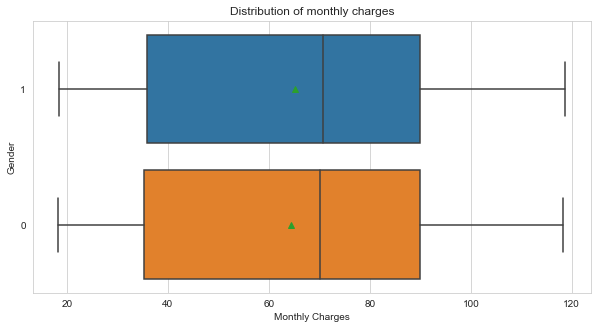

In [61]:
# VISUALIZING DISTRIBUTION OF MONTHLY CHARGES WITH GENDER USING BOXPLOT

plt.figure(figsize=(10,5))                         # fixing graph size.
sns.set_style("whitegrid")                         # fixing graph background.
sns.boxplot(x='Monthly Charges', y = "Gender", data = cust, showmeans = True)    # plotting boxplot,using both mean and median.
plt.title('Distribution of monthly charges')                      # giving title to the graph.

###### The distribution of monthly charges between males and females seems to be equal and mean also same.
###### And the distribution is right skewed.

=========================================================================================================================

### Q7: Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.

In [62]:
# FIRST CREATE A DATASET LIKE TAKING THE LOS ANGELES CITY WITH ALL COLUMNS
cust_LA = cust.loc[cust['City'] == 'Los Angeles']
cust_LA

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,1,0,0,1,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,1,0,0,1,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,1,0,1,1,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,0,0,0,1,49,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,4480-MBMLB,1,United States,California,Los Angeles,90066,"34.002028, -118.430656",34.002028,-118.430656,1,0,0,0,36,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Bank transfer (automatic),104.80,3886.45,0,0,68,5319,NaN
6768,1395-OFUWC,1,United States,California,Los Angeles,90067,"34.057496, -118.413959",34.057496,-118.413959,0,0,1,1,43,0,0,DSL,0,1,0,0,0,0,Month-to-month,0,Credit card (automatic),29.30,1224.05,0,0,70,4741,NaN
6769,0822-QGCXA,1,United States,California,Los Angeles,90068,"34.137411, -118.328915",34.137411,-118.328915,1,1,1,0,27,1,1,DSL,0,1,1,1,1,1,Month-to-month,0,Electronic check,83.85,2310.20,0,0,35,5907,NaN
6770,2832-KJCRD,1,United States,California,Los Angeles,90071,"34.052917, -118.255178",34.052917,-118.255178,1,0,0,0,38,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,103.65,3988.50,0,0,47,2511,NaN


###### After doing 'loc' function to the 'City' Column to find the total charges of Los Angeles.
###### Now We have got data of only Los Angeles City.
###### We have 'Total Charges' of all the customers who are belonging to "Los Angeles" City.
###### Now finding the minimum charges of Los angeles city using mini() function.

In [63]:
# now this data is about LA city
# using min() function finding minimum total charges of LA
cust_LA['Total Charges'].min()

18.8

###### Minimun "Total Charges" of  "Los Angeles" city is 18.8

-------------------------------------------------------------------------------------------------------------------------------

In [64]:
## FINDING ZIPCODE WHICH IS HAVING THE MAXIMUN TOTAL CHARGES OF LOS ANGELES CITY 
cust_ZCLA = cust_LA.loc[cust_LA['Total Charges'] == cust_LA['Total Charges'].max()]
cust_ZCLA

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
3117,7359-WWYJV,1,United States,California,Los Angeles,90044,"33.952714, -118.292061",33.952714,-118.292061,0,0,1,0,72,1,1,Fiber optic,1,1,1,1,1,1,Two year,0,Credit card (automatic),114.45,8375.05,0,0,53,6274,NaN


###### 'Zip Code'  :-  90044 is having the maximum Total Charges in Los Angeles City

In [65]:
## FINDING ZIPCODE WHICH IS HAVING THE MAXIMUM TOTAL CHARGES IN DATA
cust_ZC = cust.loc[cust['Total Charges'] == cust['Total Charges'].max()]
cust_ZC

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1206,2889-FPWRM,1,United States,California,Mckinleyville,95519,"40.965011, -124.015255",40.965011,-124.015255,0,0,1,0,72,1,1,Fiber optic,1,1,1,1,1,1,One year,1,Bank transfer (automatic),117.8,8684.8,1,1,100,4432,Competitor offered higher download speeds


###### Zip Code : 95519 is having the maximum Total Charges
=========================================================================================================================

### Q8: Please find which payment method has the highest churn score and which has the lowest churn score.

<AxesSubplot:xlabel='Payment Method', ylabel='Churn Score'>

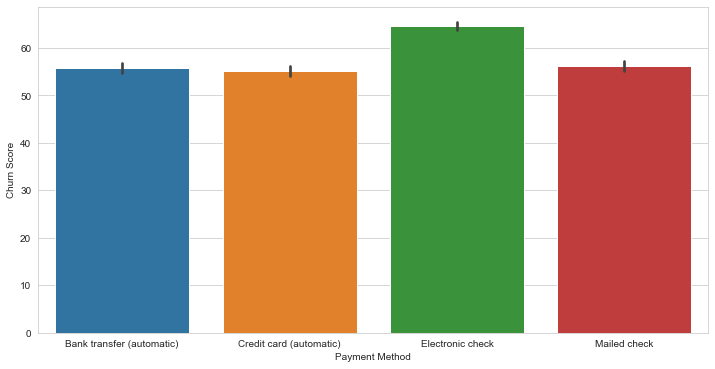

In [66]:
## VISUALIZING PAYMENT METHOD WITH CHURN SCORE BY UNSING BAR PLOT
## TO FIND THE WHICH PAYMENT METHOD IS HAVING HIGHEST AND LOWEST CHURN SCORE
plt.figure(figsize = (12,6))
sns.barplot(x = cust['Payment Method'], y = cust['Churn Score'])

######  From all the payment methods "Electronic Check" is having highest "Churn Score" .
######  And remaing 3 payments are seems equally. But among those three payments "Credit Card" is having Lowest "Churn Score"
=========================================================================================================================

### Q9: Please create an appropriate plot to check the count of payment methods and explain it.

<AxesSubplot:xlabel='Payment Method', ylabel='count'>

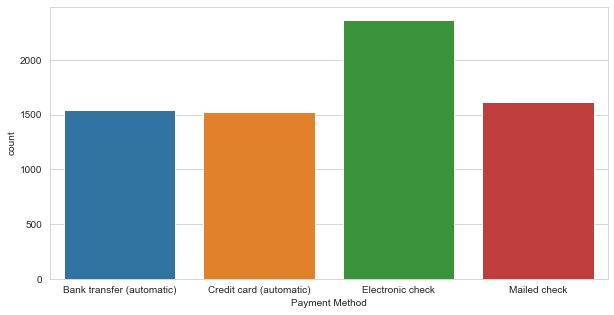

In [67]:
## BY USING COUNTPLOT CHECKING THE COUNT AND DISTRIBUTION OF SOME CATEGORICAL VARIABLES BY USING COUNT PLOT
## BY USING VALUECOUNTS FUNCTION GETTING THE COUNT OF THreE VARIABLE
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
sns.countplot(x ='Payment Method',data = cust)

=========================================================================================================================

### Q10: Please create an appropriate plot to see the relationship between monthly charges and total charges.

<AxesSubplot:xlabel='Monthly Charges', ylabel='Total Charges'>

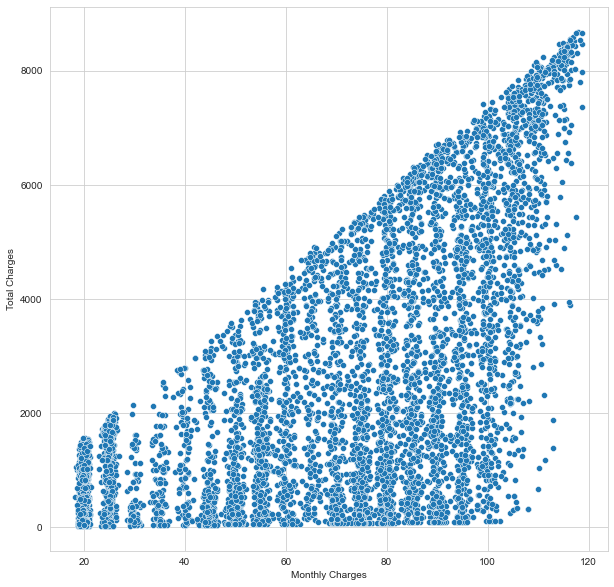

In [68]:
## VISUALIZING THE RELATIONSHIP BETWEEN MONTHLY CHARGES AND TOTAL CHARGES USING SCATTERPLOT
plt.figure(figsize = (10,10))
sns.scatterplot(cust['Monthly Charges'], cust['Total Charges'])

=========================================================================================================================

# ------------------------- PYTHON MINI CAPSTONE ASSIGNMENT --------------------------

### Q1. 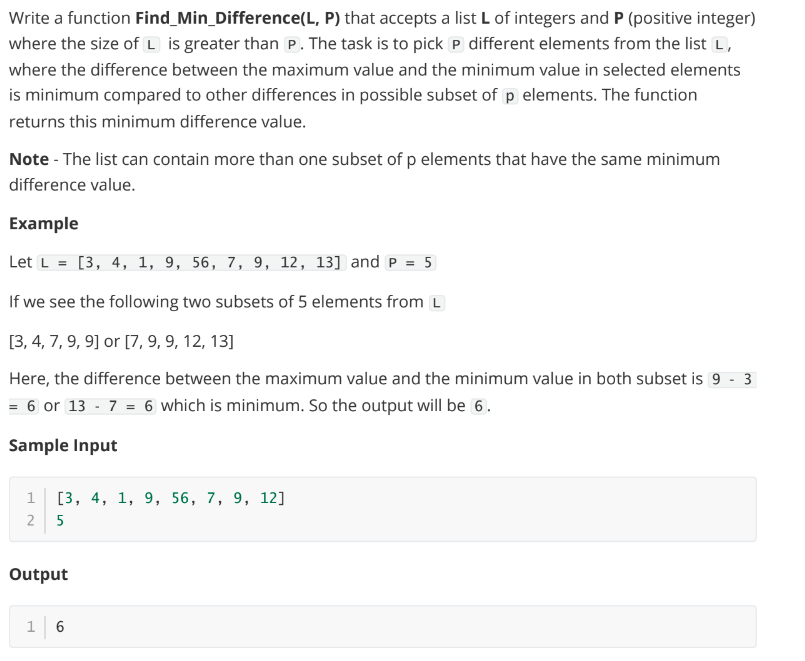

In [69]:
## using def function to definng is_prime(n)

def Find_mini_diff(L,P):
    
    ## sorting the given values in ascending order
    L.sort()
    
    ## giving the minimum value randomly which will be less the difference of (max - mini) of given list
    mindiff = -1
    
    ## here the giving the range to get the subsets count from the given list
    for i in range (len(L) - P + 1):
        
        ## calculating the (maximum value - minimum value) from obtained subsets
        diff = L[i+P-1] - L[i]
        
        ## if the diff value is less than mindiff value then it evaluates as True and gives the result
        ## if its not True it will become the minidiff value and again performs the same step 
        if diff < mindiff or mindiff == -1 :
            mindiff = diff
    
    ## After getting all the results of all subsets we will get the output as mini-value of results  
    return mindiff        
L=[3,4,1,9,56,7,9,12]
P=5
Find_mini_diff(L,P)

6

### Q2.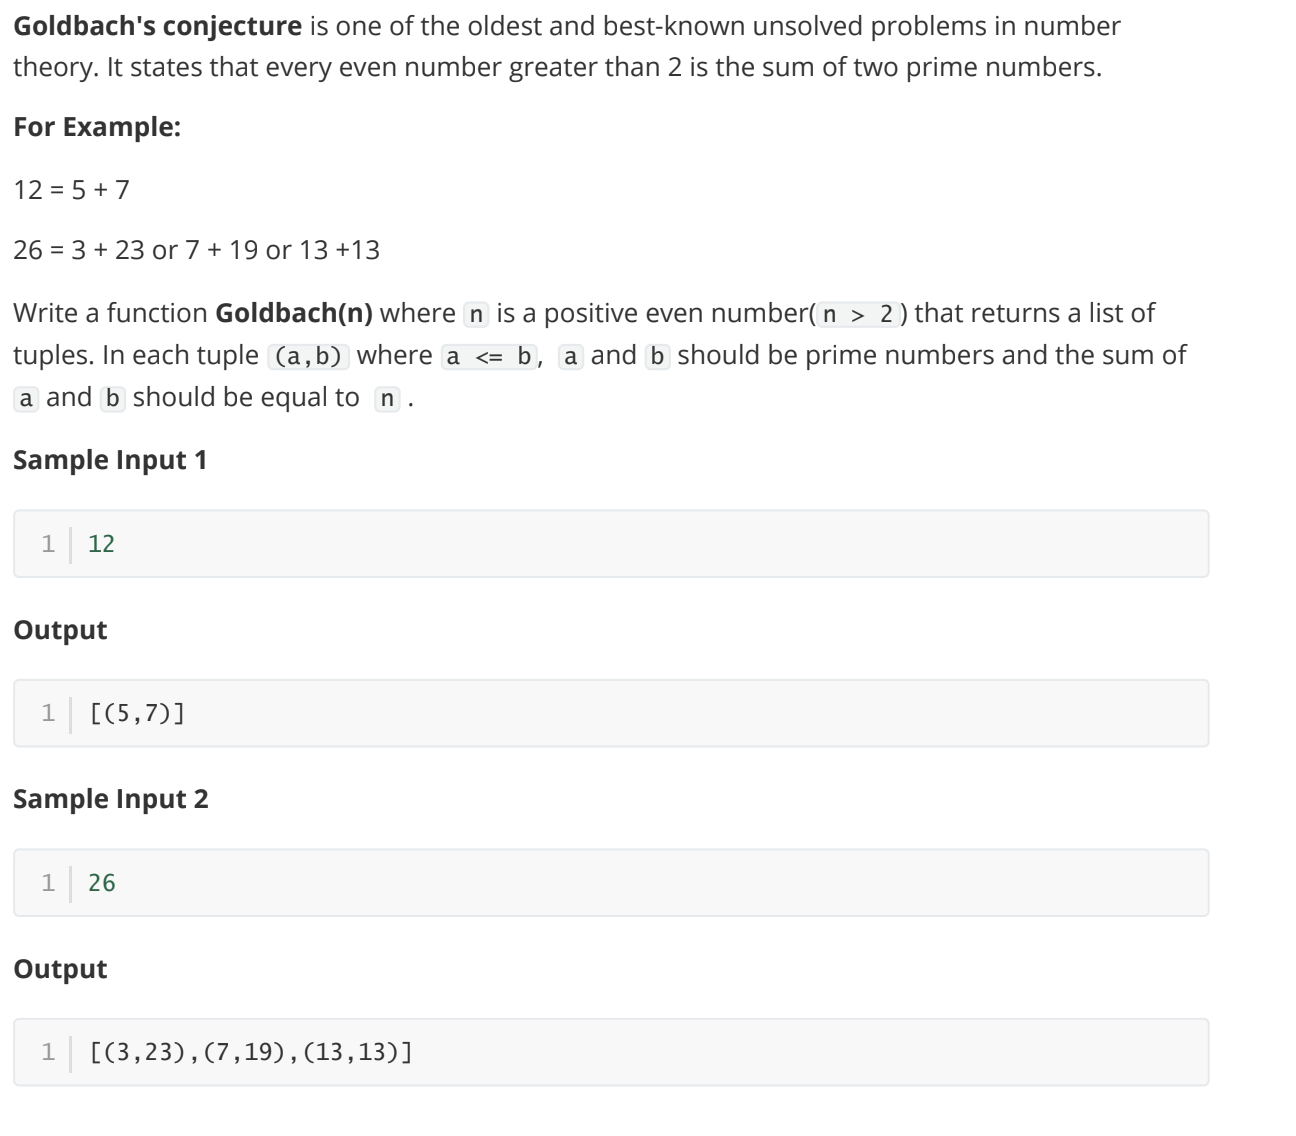

In [76]:
## using def function to define is_prime(n)

def is_prime(n):
    for i in range(2, n):
        if n % i == 0:
            # finding possible prime numbers which divides given input and which is less than that
            return False
    return True

## using def function to define primes_upto(m)

def primes_upto(n):
    pl = []
    for i in range(1, n+1):
        if is_prime(i):
            
            ## Finding the list of combinations of primenumbers which sum of those is gives even number 'n' 
            pl.append(i)
    return pl

## using def function to define goldbach(n)

def goldbach(n):
  goldbach_numbers = []
## taking pair of those prime numbers and performing the goldbach
  for i, prime1 in enumerate(primes_upto(n)):
    for j, prime2 in enumerate(primes_upto(n)):
## if the first number is less than 2nd number it will move to next step or process will break
        if prime1 <= prime2 :
        ## if above condition satisfies then checking for the sum of both numbers if given input or not
        ## if sum is given input then result will added to list
    
            t = prime1 + prime2
            if (t==n):
               goldbach_numbers.append((prime1,prime2))
  ## like that it will check for all the prime numbers that we have collected          
  return goldbach_numbers
 
n=26
print(goldbach(n))
n=100
print(goldbach(n))
n=200
print(goldbach(n))

[(3, 23), (7, 19), (13, 13)]
[(3, 97), (11, 89), (17, 83), (29, 71), (41, 59), (47, 53)]
[(1, 199), (3, 197), (7, 193), (19, 181), (37, 163), (43, 157), (61, 139), (73, 127), (97, 103)]


### Q3.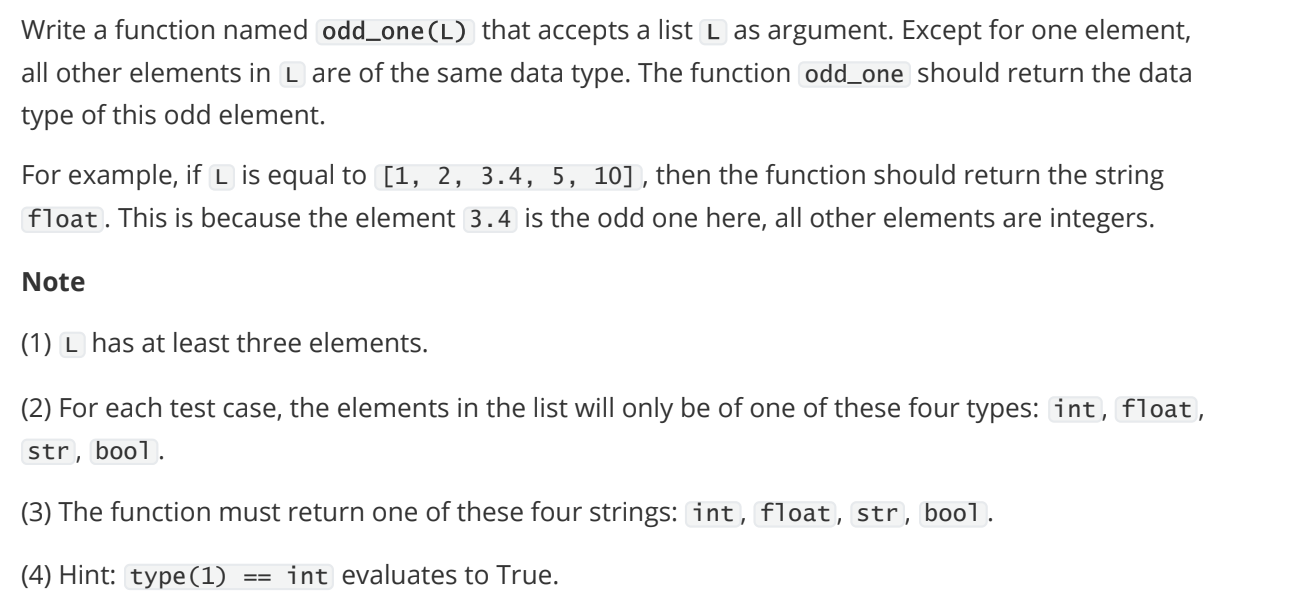

In [78]:
## by using def function defining odd_one(L)
def odd_one (L):
    ## using for loop 
    ## considering 'i' is the given list
    for i in L:
        ## performing the below process for all the elements in the given list
        if type(i) != int:
            ## in this the process where the type(i) is not equals to 'int'
            ## the process will break and gives the input
            return type(i)
    ## if the type(i) is equal to int after checking for all elements it will gives int    
    return int

In [79]:
odd_one([1,2,3,5,10])

int

In [83]:
odd_one([2,3,3.3,6])

float

In [81]:
odd_one([1,3,"Hello",6])

str

In [84]:
odd_one([2,3,False,6])

bool

========================================================================================================================